In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brainwave/emotions.csv


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/brainwave/emotions.csv')

# Inspect the first few rows
print(data.head())


   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
from sklearn.linear_model import Lasso
# Separate features (X) and labels (y)
X = data.drop(columns=['label'])  # Features
y = data['label']  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.preprocessing import LabelEncoder

# Encode the target labels (NEGATIVE -> 0, NEUTRAL -> 1, POSITIVE -> 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check encoding mapping
print("Label Encoding Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Encoding Mapping: {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}


In [5]:
X

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


In [6]:
# Apply LASSO for feature selection
alpha = 0.09  # Regularization strength (adjust as needed)
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, y)

# Identify selected features (non-zero coefficients)
selected_features_indices = np.where(lasso.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]
print(f"Selected {len(selected_features)} features: {selected_features}")

Selected 20 features: Index(['mean_4_a', 'max_q_1_a', 'max_q_3_a', 'min_0_a', 'min_q_7_a',
       'logm_8_a', 'logm_9_a', 'logm_42_a', 'logm_64_a', 'entropy0_a',
       'fft_136_a', 'fft_139_a', 'mean_4_b', 'max_q_3_b', 'max_q_13_b',
       'logm_8_b', 'logm_9_b', 'logm_42_b', 'logm_64_b', 'entropy0_b'],
      dtype='object')


In [7]:
# Subset the dataset with selected features
X = X_scaled[:, selected_features_indices]

# Split the feature-selected data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

array([[-0.3701691 , -0.24602564, -1.23202932, ..., -0.07338741,
        -0.12357338, -0.56289935],
       [-0.07406107, -1.1581223 , -0.58136809, ..., -0.47389406,
        -1.12445578, -0.56289935],
       [-0.02470973,  0.44681701, -0.50455614, ..., -0.41598948,
         0.12301126, -0.56289935],
       ...,
       [-0.2080147 , -0.82485621, -1.18274165, ..., -0.96125756,
         0.13755512, -0.56289935],
       [ 0.12334429,  0.04338964,  0.56441018, ..., -0.36339282,
        -0.24785732,  1.78106712],
       [ 0.3489504 ,  0.36788557, -0.44374668, ..., -0.06373665,
         0.59436473, -0.56289935]])

Training Logistic Regression...
Logistic Regression Accuracy: 0.8946
Logistic Regression Precision: 0.8971
Logistic Regression Recall: 0.8931
Logistic Regression F1 Score: 0.8930
Training Time: 0.0397 seconds

Training Random Forest...
Random Forest Accuracy: 0.9719
Random Forest Precision: 0.9717
Random Forest Recall: 0.9714
Random Forest F1 Score: 0.9715
Training Time: 0.4344 seconds

Training Decision Tree...
Decision Tree Accuracy: 0.9180
Decision Tree Precision: 0.9168
Decision Tree Recall: 0.9168
Decision Tree F1 Score: 0.9167
Training Time: 0.0248 seconds

Training KNN...
KNN Accuracy: 0.9438
KNN Precision: 0.9439
KNN Recall: 0.9435
KNN F1 Score: 0.9431
Training Time: 0.0010 seconds

Training SVM...
SVM Accuracy: 0.8993
SVM Precision: 0.9074
SVM Recall: 0.8962
SVM F1 Score: 0.8960
Training Time: 0.2374 seconds

Training AdaBoost...
AdaBoost Accuracy: 0.6581
AdaBoost Precision: 0.5333
AdaBoost Recall: 0.6437
AdaBoost F1 Score: 0.5459
Training Time: 0.5204 seconds

Training Gaussi

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

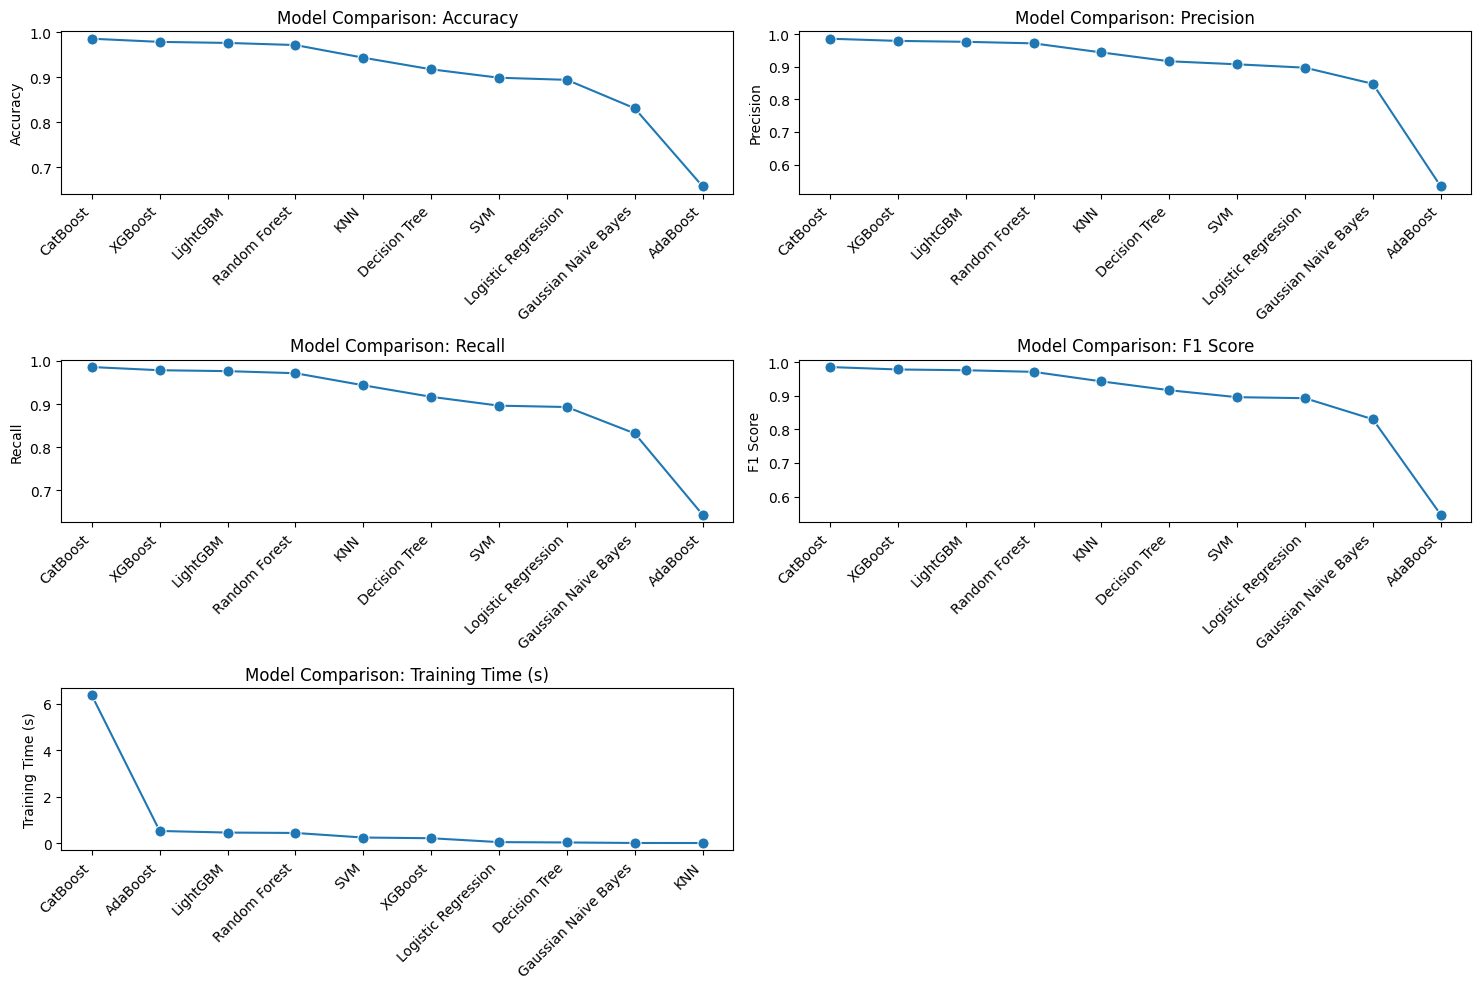

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Plot results
    plot_comparison(results)
    
    return results

# Function to plot comparison graphs
def plot_comparison(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        sorted_results = sorted(results.items(), key=lambda x: x[1][metric], reverse=True)
        models = [x[0] for x in sorted_results]
        scores = [x[1][metric] for x in sorted_results]
        
        sns.lineplot(x=models, y=scores, marker='o', linestyle='-', markersize=8)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(metric)
        plt.title(f'Model Comparison: {metric}')
        
    plt.tight_layout()
    plt.show()

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


In [10]:
# Apply LASSO for feature selection
alpha = 0.01  # Regularization strength (adjust as needed)
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, y)

# Identify selected features (non-zero coefficients)
selected_features_indices = np.where(lasso.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]
print(f"Selected {len(selected_features)} features: {selected_features}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.496e+00, tolerance: 1.416e-01
  model = cd_fast.enet_coordinate_descent(


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
selected_features

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Plot results
    plot_comparison(results)
    
    return results

# Function to plot comparison graphs
def plot_comparison(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        sorted_results = sorted(results.items(), key=lambda x: x[1][metric], reverse=True)
        models = [x[0] for x in sorted_results]
        scores = [x[1][metric] for x in sorted_results]
        
        sns.lineplot(x=models, y=scores, marker='o', linestyle='-', markersize=8)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(metric)
        plt.title(f'Model Comparison: {metric}')
        
    plt.tight_layout()
    plt.show()

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


In [ ]:
# Apply LASSO for feature selection
alpha = 0.02  # Regularization strength (adjust as needed)
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, y)

# Identify selected features (non-zero coefficients)
selected_features_indices = np.where(lasso.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]
print(f"Selected {len(selected_features)} features: {selected_features}")

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Plot results
    plot_comparison(results)
    
    return results

# Function to plot comparison graphs
def plot_comparison(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        sorted_results = sorted(results.items(), key=lambda x: x[1][metric], reverse=True)
        models = [x[0] for x in sorted_results]
        scores = [x[1][metric] for x in sorted_results]
        
        sns.lineplot(x=models, y=scores, marker='o', linestyle='-', markersize=8)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(metric)
        plt.title(f'Model Comparison: {metric}')
        
    plt.tight_layout()
    plt.show()

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


In [ ]:
# Apply LASSO for feature selection
alpha = 0.001  # Regularization strength (adjust as needed)
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, y)

# Identify selected features (non-zero coefficients)
selected_features_indices = np.where(lasso.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]
print(f"Selected {len(selected_features)} features: {selected_features}")

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Plot results
    plot_comparison(results)
    
    return results

# Function to plot comparison graphs
def plot_comparison(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        sorted_results = sorted(results.items(), key=lambda x: x[1][metric], reverse=True)
        models = [x[0] for x in sorted_results]
        scores = [x[1][metric] for x in sorted_results]
        
        sns.lineplot(x=models, y=scores, marker='o', linestyle='-', markersize=8)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(metric)
        plt.title(f'Model Comparison: {metric}')
        
    plt.tight_layout()
    plt.show()

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/brainwave/emotions.csv')

# Inspect the first few rows
print(data.head())


In [ ]:
all_columns = data.columns.tolist()

# Print all column names
print(all_columns)

In [11]:
power_band_columns = ['# mean_0_a','mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2', 'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2', 'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a', 'mean_d_10_a', 'mean_d_11_a', 'mean_d_12_a', 'mean_d_13_a', 'mean_d_14_a', 'mean_d_15_a', 'mean_d_16_a', 'mean_d_17_a', 'mean_d_18_a', 'mean_d_19_a', 'mean_d_20_a', 'mean_d_21_a', 'mean_d_22_a', 'mean_d_23_a', 'mean_d_24_a', 'mean_d_25_a', 'mean_d_26_a', 'mean_d_27_a', 'mean_d_28_a', 'mean_d_29_a', 'mean_d_30_a', 'mean_d_31_a', 'mean_d_32_a', 'mean_d_33_a', 'mean_d_34_a', 'mean_d_35_a', 'mean_d_36_a', 'mean_d_37_a', 'mean_d_38_a', 'mean_d_39_a', 'mean_d_40_a', 'mean_d_41_a', 'mean_d_42_a', 'mean_d_43_a', 'mean_d_44_a', 'mean_d_45_a', 'mean_d_46_a', 'mean_d_47_a', 'mean_d_48_a', 'mean_d_49_a', 'stddev_0_a', 'stddev_1_a', 'stddev_2_a', 'stddev_3_a', 'stddev_4_a', 'stddev_d_0_a', 'stddev_d_1_a', 'stddev_d_2_a', 'stddev_d_3_a', 'stddev_d_4_a', 'moments_0_a', 'moments_1_a', 'moments_2_a', 'moments_3_a', 'moments_4_a', 'moments_5_a', 'moments_6_a', 'moments_7_a', 'moments_8_a', 'moments_9_a', 'moments_10_a', 'moments_11_a', 'moments_12_a', 'moments_13_a', 'moments_14_a', 'moments_15_a', 'moments_16_a', 'moments_17_a', 'moments_18_a', 'moments_19_a', 'max_0_a', 'max_1_a', 'max_2_a', 'max_3_a', 'max_4_a', 'max_d_0_a', 'max_d_1_a', 'max_d_2_a', 'max_d_3_a', 'max_d_4_a', 'max_q_0_a', 'max_q_1_a', 'max_q_2_a', 'max_q_3_a', 'max_q_4_a', 'max_q_5_a', 'max_q_6_a', 'max_q_7_a', 'max_q_8_a', 'max_q_9_a', 'max_q_10_a', 'max_q_11_a', 'max_q_12_a', 'max_q_13_a', 'max_q_14_a', 'max_q_15_a', 'max_q_16_a', 'max_q_17_a', 'max_q_18_a', 'max_q_19_a', 'max_q_20_a', 'max_q_21_a', 'max_q_22_a', 'max_q_23_a', 'max_q_24_a', 'max_q_25_a', 'max_q_26_a', 'max_q_27_a', 'max_q_28_a', 'max_q_29_a', 'max_q_30_a', 'max_q_31_a', 'max_q_32_a', 'max_q_33_a', 'max_q_34_a', 'max_q_35_a', 'max_q_36_a', 'max_q_37_a', 'max_q_38_a', 'max_q_39_a', 'max_q_40_a', 'max_q_41_a', 'max_q_42_a', 'max_q_43_a', 'max_q_44_a', 'max_q_45_a', 'max_q_46_a', 'max_q_47_a', 'max_q_48_a', 'max_q_49_a', 'min_0_a', 'min_1_a', 'min_2_a', 'min_3_a', 'min_4_a', 'min_d_0_a', 'min_d_1_a', 'min_d_2_a', 'min_d_3_a', 'min_d_4_a', 'min_q_0_a', 'min_q_1_a', 'min_q_2_a', 'min_q_3_a', 'min_q_4_a', 'min_q_5_a', 'min_q_6_a', 'min_q_7_a', 'min_q_8_a', 'min_q_9_a', 'min_q_10_a', 'min_q_11_a', 'min_q_12_a', 'min_q_13_a', 'min_q_14_a', 'min_q_15_a', 'min_q_16_a', 'min_q_17_a', 'min_q_18_a', 'min_q_19_a', 'min_q_20_a', 'min_q_21_a', 'min_q_22_a', 'min_q_23_a', 'min_q_24_a', 'min_q_25_a', 'min_q_26_a', 'min_q_27_a', 'min_q_28_a', 'min_q_29_a', 'min_q_30_a', 'min_q_31_a', 'min_q_32_a', 'min_q_33_a', 'min_q_34_a', 'min_q_35_a', 'min_q_36_a', 'min_q_37_a', 'min_q_38_a', 'min_q_39_a', 'min_q_40_a', 'min_q_41_a', 'min_q_42_a', 'min_q_43_a', 'min_q_44_a', 'min_q_45_a', 'min_q_46_a', 'min_q_47_a', 'min_q_48_a', 'min_q_49_a', 'covmat_0_a', 'covmat_1_a', 'covmat_2_a', 'covmat_3_a', 'covmat_4_a', 'covmat_5_a', 'covmat_6_a', 'covmat_7_a', 'covmat_8_a', 'covmat_9_a', 'covmat_10_a', 'covmat_11_a', 'covmat_12_a', 'covmat_13_a', 'covmat_14_a', 'covmat_15_a', 'covmat_16_a', 'covmat_17_a', 'covmat_18_a', 'covmat_19_a', 'covmat_20_a', 'covmat_21_a', 'covmat_22_a', 'covmat_23_a', 'covmat_24_a', 'covmat_25_a', 'covmat_26_a', 'covmat_27_a', 'covmat_28_a', 'covmat_29_a', 'covmat_30_a', 'covmat_31_a', 'covmat_32_a', 'covmat_33_a', 'covmat_34_a', 'covmat_35_a', 'covmat_36_a', 'covmat_37_a', 'covmat_38_a', 'covmat_39_a', 'covmat_40_a', 'covmat_41_a', 'covmat_42_a', 'covmat_43_a', 'covmat_44_a', 'covmat_45_a', 'covmat_46_a', 'covmat_47_a', 'covmat_48_a', 'covmat_49_a', 'covmat_50_a', 'covmat_51_a', 'covmat_52_a', 'covmat_53_a', 'covmat_54_a', 'covmat_55_a', 'covmat_56_a', 'covmat_57_a', 'covmat_58_a', 'covmat_59_a', 'covmat_60_a', 'covmat_61_a', 'covmat_62_a', 'covmat_63_a', 'covmat_64_a', 'covmat_65_a', 'covmat_66_a', 'covmat_67_a', 'covmat_68_a', 'covmat_69_a', 'covmat_70_a', 'covmat_71_a', 'covmat_72_a', 'covmat_73_a', 'covmat_74_a', 'covmat_75_a', 'covmat_76_a', 'covmat_77_a', 'covmat_78_a', 'covmat_79_a', 'covmat_80_a', 'covmat_81_a', 'covmat_82_a', 'covmat_83_a', 'covmat_84_a', 'covmat_85_a', 'covmat_86_a', 'covmat_87_a', 'covmat_88_a', 'covmat_89_a', 'covmat_90_a', 'covmat_91_a', 'covmat_92_a', 'covmat_93_a', 'covmat_94_a', 'covmat_95_a', 'covmat_96_a', 'covmat_97_a', 'covmat_98_a', 'covmat_99_a', 'covmat_100_a', 'covmat_101_a', 'covmat_102_a', 'covmat_103_a', 'covmat_104_a', 'covmat_105_a', 'covmat_106_a', 'covmat_107_a', 'covmat_108_a', 'covmat_109_a', 'covmat_110_a', 'covmat_111_a', 'covmat_112_a', 'covmat_113_a', 'covmat_114_a', 'covmat_115_a', 'covmat_116_a', 'covmat_117_a', 'covmat_118_a', 'covmat_119_a', 'covmat_120_a', 'covmat_121_a', 'covmat_122_a', 'covmat_123_a', 'covmat_124_a', 'covmat_125_a', 'covmat_126_a', 'covmat_127_a', 'covmat_128_a', 'covmat_129_a', 'covmat_130_a', 'covmat_131_a', 'covmat_132_a', 'covmat_133_a', 'covmat_134_a', 'covmat_135_a', 'covmat_136_a', 'covmat_137_a', 'covmat_138_a', 'covmat_139_a', 'covmat_140_a', 'covmat_141_a', 'covmat_142_a', 'covmat_143_a', 'eigen_0_a', 'eigen_1_a', 'eigen_2_a', 'eigen_3_a', 'eigen_4_a', 'eigen_5_a', 'eigen_6_a', 'eigen_7_a', 'eigen_8_a', 'eigen_9_a', 'eigen_10_a', 'eigen_11_a', 'logm_0_a', 'logm_1_a', 'logm_2_a', 'logm_3_a', 'logm_4_a', 'logm_5_a', 'logm_6_a', 'logm_7_a', 'logm_8_a', 'logm_9_a', 'logm_10_a', 'logm_11_a', 'logm_12_a', 'logm_13_a', 'logm_14_a', 'logm_15_a', 'logm_16_a', 'logm_17_a', 'logm_18_a', 'logm_19_a', 'logm_20_a', 'logm_21_a', 'logm_22_a', 'logm_23_a', 'logm_24_a', 'logm_25_a', 'logm_26_a', 'logm_27_a', 'logm_28_a', 'logm_29_a', 'logm_30_a', 'logm_31_a', 'logm_32_a', 'logm_33_a', 'logm_34_a', 'logm_35_a', 'logm_36_a', 'logm_37_a', 'logm_38_a', 'logm_39_a', 'logm_40_a', 'logm_41_a', 'logm_42_a', 'logm_43_a', 'logm_44_a', 'logm_45_a', 'logm_46_a', 'logm_47_a', 'logm_48_a', 'logm_49_a', 'logm_50_a', 'logm_51_a', 'logm_52_a', 'logm_53_a', 'logm_54_a', 'logm_55_a', 'logm_56_a', 'logm_57_a', 'logm_58_a', 'logm_59_a', 'logm_60_a', 'logm_61_a', 'logm_62_a', 'logm_63_a', 'logm_64_a', 'logm_65_a', 'logm_66_a', 'logm_67_a', 'logm_68_a', 'logm_69_a', 'logm_70_a', 'logm_71_a', 'logm_72_a', 'logm_73_a', 'logm_74_a', 'logm_75_a', 'logm_76_a', 'logm_77_a', 'entropy0_a', 'entropy1_a', 'entropy2_a', 'entropy3_a', 'entropy4_a', 'correlate_0_a', 'correlate_1_a', 'correlate_2_a', 'correlate_3_a', 'correlate_4_a', 'correlate_5_a', 'correlate_6_a', 'correlate_7_a', 'correlate_8_a', 'correlate_9_a', 'correlate_10_a', 'correlate_11_a', 'correlate_12_a', 'correlate_13_a', 'correlate_14_a', 'correlate_15_a', 'correlate_16_a', 'correlate_17_a', 'correlate_18_a', 'correlate_19_a', 'correlate_20_a', 'correlate_21_a', 'correlate_22_a', 'correlate_23_a', 'correlate_24_a', 'correlate_25_a', 'correlate_26_a', 'correlate_27_a', 'correlate_28_a', 'correlate_29_a', 'correlate_30_a', 'correlate_31_a', 'correlate_32_a', 'correlate_33_a', 'correlate_34_a', 'correlate_35_a', 'correlate_36_a', 'correlate_37_a', 'correlate_38_a', 'correlate_39_a', 'correlate_40_a', 'correlate_41_a', 'correlate_42_a', 'correlate_43_a', 'correlate_44_a', 'correlate_45_a', 'correlate_46_a', 'correlate_47_a', 'correlate_48_a', 'correlate_49_a', 'correlate_50_a', 'correlate_51_a', 'correlate_52_a', 'correlate_53_a', 'correlate_54_a', 'correlate_55_a', 'correlate_56_a', 'correlate_57_a', 'correlate_58_a', 'correlate_59_a', 'correlate_60_a', 'correlate_61_a', 'correlate_62_a', 'correlate_63_a', 'correlate_64_a', 'correlate_65_a', 'correlate_66_a', 'correlate_67_a', 'correlate_68_a', 'correlate_69_a', 'correlate_70_a', 'correlate_71_a', 'correlate_72_a', 'correlate_73_a', 'correlate_74_a','label']

In [12]:
X = data[power_band_columns]  # Features
y = data['label']  # Labels

In [13]:
X

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,correlate_66_a,correlate_67_a,correlate_68_a,correlate_69_a,correlate_70_a,correlate_71_a,correlate_72_a,correlate_73_a,correlate_74_a,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,223000.0,19100.0,166000.0,225000.0,9300.0,186000.0,276000.0,9230.0,278000.0,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,1700.0,3340.0,3610.0,8930.0,4010.0,6350.0,11200.0,6050.0,5110.0,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,53400.0,170000.0,165000.0,85200.0,232000.0,206000.0,141000.0,455000.0,114000.0,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,5520.0,125000.0,570.0,-21100.0,455000.0,8630.0,3990.0,133000.0,5820.0,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,10500.0,9530.0,11800.0,17100.0,12100.0,4020.0,-798.0,-1660.0,-10200.0,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,2880.0,3520.0,4320.0,5980.0,5060.0,6360.0,5490.0,4210.0,6290.0,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,27100.0,183000.0,40100.0,7580.0,213000.0,84700.0,19800.0,285000.0,34700.0,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,213000.0,202000.0,4660.0,229000.0,130000.0,16600.0,162000.0,190000.0,14200.0,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,9220.0,123000.0,503000.0,14300.0,106000.0,377000.0,746.0,88000.0,396000.0,NEGATIVE


In [14]:
X

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,correlate_66_a,correlate_67_a,correlate_68_a,correlate_69_a,correlate_70_a,correlate_71_a,correlate_72_a,correlate_73_a,correlate_74_a,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,223000.0,19100.0,166000.0,225000.0,9300.0,186000.0,276000.0,9230.0,278000.0,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,1700.0,3340.0,3610.0,8930.0,4010.0,6350.0,11200.0,6050.0,5110.0,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,53400.0,170000.0,165000.0,85200.0,232000.0,206000.0,141000.0,455000.0,114000.0,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,5520.0,125000.0,570.0,-21100.0,455000.0,8630.0,3990.0,133000.0,5820.0,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,10500.0,9530.0,11800.0,17100.0,12100.0,4020.0,-798.0,-1660.0,-10200.0,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,2880.0,3520.0,4320.0,5980.0,5060.0,6360.0,5490.0,4210.0,6290.0,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,27100.0,183000.0,40100.0,7580.0,213000.0,84700.0,19800.0,285000.0,34700.0,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,213000.0,202000.0,4660.0,229000.0,130000.0,16600.0,162000.0,190000.0,14200.0,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,9220.0,123000.0,503000.0,14300.0,106000.0,377000.0,746.0,88000.0,396000.0,NEGATIVE


In [15]:
# Separate features and target
X = data[power_band_columns]   # Assuming 'label' is the target column
y = data['label']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y)


In [16]:
y

0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
2127     NEUTRAL
2128    POSITIVE
2129    NEGATIVE
2130    NEGATIVE
2131     NEUTRAL
Name: label, Length: 2132, dtype: object

In [17]:


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1705, 525)
Test set size: (427, 525)


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert labels to numbers
y_test = label_encoder.transform(y_test)  # Apply same transformation


In [19]:
print(X_train.dtypes)  # Check data types of all features
print(X_train.select_dtypes(include=['object']).head())  # Show non-numeric values


# mean_0_a        float64
mean_1_a          float64
mean_2_a          float64
mean_3_a          float64
mean_4_a          float64
                   ...   
correlate_71_a    float64
correlate_72_a    float64
correlate_73_a    float64
correlate_74_a    float64
label              object
Length: 525, dtype: object
         label
480   POSITIVE
1394  POSITIVE
1204  POSITIVE
1654  NEGATIVE
1010  NEGATIVE


In [20]:
X_train = X_train.drop(columns=["label"])
X_test = X_test.drop(columns=["label"])


In [21]:
X_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,correlate_65_a,correlate_66_a,correlate_67_a,correlate_68_a,correlate_69_a,correlate_70_a,correlate_71_a,correlate_72_a,correlate_73_a,correlate_74_a
480,-2.450,24.6,2.16,-10.400,18.9,-2.650,-0.101,7.930,1.2500,6.290,...,1020.0,840.0,2450.0,111.0,1770.0,2480.0,1940.0,1110.00,2200.0,949.0
1394,6.340,16.9,22.40,0.164,23.1,-1.590,-0.530,-0.792,0.3130,0.414,...,3360.0,-2190.0,4810.0,1810.0,2520.0,2900.0,5720.0,4890.00,7200.0,377.0
1204,12.900,30.5,-269.00,13.100,23.8,1.120,-1.890,27.900,2.6300,-2.040,...,7210.0,-3180.0,207000.0,88200.0,-11600.0,351000.0,25600.0,-1400.00,256000.0,19100.0
1654,-12.400,26.6,-870.00,8.590,24.8,7.880,-1.530,-2.680,-0.4580,-3.810,...,648000.0,1030000.0,804000.0,641000.0,997000.0,854000.0,682000.0,985000.00,848000.0,657000.0
1010,15.400,26.6,-137.00,14.900,29.4,-0.609,0.198,17.700,0.3730,2.000,...,78100.0,98700.0,146000.0,137000.0,52700.0,58700.0,150000.0,171000.00,62800.0,56700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,13.900,17.5,-327.00,3.810,27.1,-6.400,-5.460,8.670,-0.0145,3.070,...,14500.0,335000.0,187000.0,9920.0,241000.0,230000.0,800.0,224000.00,272000.0,-4150.0
1095,31.300,31.0,30.70,28.900,27.5,2.800,0.253,-3.680,-1.1800,12.300,...,3880.0,6020.0,8070.0,5590.0,6080.0,5690.0,6800.0,1930.00,1380.0,1740.0
1130,0.959,24.5,7.31,-12.600,21.2,-4.170,0.307,-18.300,3.1700,-10.700,...,1210.0,1850.0,2450.0,-1240.0,2270.0,2760.0,3660.0,1150.00,2190.0,891.0
1294,26.700,29.3,22.70,26.000,25.9,8.500,1.680,-2.560,1.6700,-0.216,...,6640.0,-12.2,2290.0,4130.0,3150.0,3170.0,4580.0,-5.33,2290.0,8230.0


In [ ]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0),
         "SVM": SVC(kernel='linear', probability=True)
    }
# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
        # Print all results
    print("\nFinal Results for All Models:")
    for model, metrics in results.items():
        print(f"\nModel: {model}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
    
    return results

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)

Training Logistic Regression...
Logistic Regression Accuracy: 0.3349
Logistic Regression Precision: 0.1116
Logistic Regression Recall: 0.3333
Logistic Regression F1 Score: 0.1673
Training Time: 0.0453 seconds

Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Random Forest Accuracy: 0.9883
Random Forest Precision: 0.9884
Random Forest Recall: 0.9879
Random Forest F1 Score: 0.9881
Training Time: 2.0504 seconds

Training Decision Tree...
Decision Tree Accuracy: 0.9578
Decision Tree Precision: 0.9576
Decision Tree Recall: 0.9571
Decision Tree F1 Score: 0.9573
Training Time: 0.5970 seconds

Training KNN...
KNN Accuracy: 0.8009
KNN Precision: 0.7956
KNN Recall: 0.7974
KNN F1 Score: 0.7955
Training Time: 0.0127 seconds

Training AdaBoost...
AdaBoost Accuracy: 0.9133
AdaBoost Precision: 0.9178
AdaBoost Recall: 0.9110
AdaBoost F1 Score: 0.9113
Training Time: 10.9201 seconds

Training Gaussian Naive Bayes...
Gaussian Naive Bayes Accuracy: 0.4122
Gaussian Naive Bayes Precision: 0.5729
Gaussian Naive Bayes Recall: 0.4022
Gaussian Naive Bayes F1 Score: 0.2998
Training Time: 0.0252 seconds

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the ov